## Importing Training Dataset

Neste projeto vamos utilizar apenas os dataset madelon_train.data e madelon_train.labels. Não vamos criar um dataset de validação. Para cada pipeline vamos executar uma validação do tipo cross-validation.

In [1]:
import pandas as pd
X_train = pd.read_csv("../../../data/madelon_train.data", 
                      header=None, index_col=None, delimiter=' ')
X_train = X_train.drop(columns=[500])

X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 7.6 MB


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [2]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,...,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,...,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,...,407.000000,463.000000,391.000000,130.000000,368.00000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,485.000000,477.000000,475.000000,475.000000,452.750000,476.000000,477.000000,474.00000,...,468.000000,476.000000,471.000000,404.000000,470.00000,486.000000,474.000000,474.000000,482.000000,473.000000
50%,482.000000,483.000000,510.500000,483.000000,500.000000,479.000000,480.000000,477.000000,487.000000,479.00000,...,482.000000,479.000000,486.000000,504.000000,492.00000,511.000000,478.000000,483.000000,508.000000,490.000000
75%,486.000000,503.000000,536.000000,490.000000,528.000000,484.000000,506.250000,477.000000,496.250000,484.00000,...,496.000000,481.000000,502.000000,586.000000,517.00000,535.000000,482.000000,492.000000,533.000000,507.250000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.00000,...,549.000000,497.000000,566.000000,920.000000,615.00000,661.000000,500.000000,535.000000,644.000000,583.000000


In [4]:
X_train.isna().sum().sum()

0

Não existem valores faltantes e existe uma pequena variação entre os valores das variáveis. Faz sentido normalizar o dataset. Além disso, todas as variáveis são numéricas. 

In [5]:
# normalizing training dataframe
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train), 
        index=X_train.index, 
        columns=X_train.columns
    )

X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.560976,0.438356,0.588028,0.393939,0.255521,0.260870,0.566787,0.5,0.424528,0.375000,...,0.492958,0.529412,0.491429,0.449367,0.578947,0.330798,0.558140,0.44,0.398577,0.516667
1,0.512195,0.351598,0.316901,0.515152,0.681388,0.347826,0.693141,0.8,0.518868,0.291667,...,0.394366,0.441176,0.548571,0.263291,0.587045,0.334601,0.604651,0.57,0.523132,0.633333
2,0.609756,0.735160,0.454225,0.227273,0.242902,0.260870,0.389892,0.7,0.471698,0.458333,...,0.563380,0.529412,0.577143,0.658228,0.558704,0.391635,0.534884,0.54,0.483986,0.527778
3,0.439024,0.502283,0.492958,0.484848,0.391167,0.282609,0.299639,0.3,0.679245,0.437500,...,0.591549,0.500000,0.474286,0.559494,0.348178,0.269962,0.418605,0.47,0.466192,0.322222
4,0.536585,0.552511,0.556338,0.545455,0.299685,0.478261,0.245487,0.7,0.537736,0.270833,...,0.570423,0.470588,0.348571,0.386076,0.477733,0.418251,0.558140,0.69,0.469751,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.682927,0.566210,0.468310,0.318182,0.290221,0.043478,0.667870,0.5,0.830189,0.250000,...,0.422535,0.470588,0.331429,0.579747,0.530364,0.410646,0.418605,0.28,0.512456,0.544444
1996,0.439024,0.429224,0.373239,0.409091,0.391167,0.500000,0.653430,0.8,0.471698,0.604167,...,0.401408,0.323529,0.468571,0.372152,0.348178,0.653992,0.441860,0.58,0.362989,0.455556
1997,0.439024,0.621005,0.919014,0.257576,0.359621,0.326087,0.725632,0.5,0.594340,0.229167,...,0.661972,0.588235,0.502857,0.705063,0.485830,0.342205,0.604651,0.65,0.569395,0.433333
1998,0.536585,0.456621,0.475352,0.378788,0.539432,0.391304,0.664260,0.6,0.754717,0.354167,...,0.563380,0.588235,0.771429,0.784810,0.477733,0.498099,0.627907,0.38,0.583630,0.455556


In [6]:
X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.481037,0.467820,0.493542,0.460371,0.412027,0.440413,0.527471,0.556500,0.535788,0.495604,...,0.531398,0.465044,0.544894,0.464007,0.508095,0.429251,0.493477,0.483090,0.515932,0.484811
std,0.156629,0.137837,0.136969,0.137271,0.130566,0.147738,0.146483,0.138446,0.141923,0.149811,...,0.147113,0.117992,0.136956,0.161564,0.140968,0.142431,0.136758,0.135598,0.132471,0.143474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.365854,0.378995,0.404930,0.363636,0.328076,0.347826,0.428700,0.500000,0.443396,0.395833,...,0.429577,0.382353,0.457143,0.346835,0.412955,0.334601,0.395349,0.390000,0.423488,0.388889
50%,0.487805,0.465753,0.494718,0.454545,0.406940,0.434783,0.527076,0.600000,0.537736,0.500000,...,0.528169,0.470588,0.542857,0.473418,0.502024,0.429658,0.488372,0.480000,0.516014,0.483333
75%,0.585366,0.557078,0.584507,0.560606,0.495268,0.543478,0.621841,0.600000,0.625000,0.604167,...,0.626761,0.529412,0.634286,0.577215,0.603239,0.520913,0.581395,0.570000,0.604982,0.579167
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y = pd.read_csv("../../../data/madelon_train.labels", header=None, delimiter=' ')

In [31]:
y[0].value_counts()

 1    1000
-1    1000
Name: 0, dtype: int64

O dataset é balanceado. Existem exatamente 1000 exemplos com valor 1 e 1000 exemplos com valor -1

In [36]:
df = X_train_scaled
df['target'] = y[0]

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
0,0.560976,0.438356,0.588028,0.393939,0.255521,0.260870,0.566787,0.5,0.424528,0.375000,...,0.529412,0.491429,0.449367,0.578947,0.330798,0.558140,0.44,0.398577,0.516667,-1
1,0.512195,0.351598,0.316901,0.515152,0.681388,0.347826,0.693141,0.8,0.518868,0.291667,...,0.441176,0.548571,0.263291,0.587045,0.334601,0.604651,0.57,0.523132,0.633333,-1
2,0.609756,0.735160,0.454225,0.227273,0.242902,0.260870,0.389892,0.7,0.471698,0.458333,...,0.529412,0.577143,0.658228,0.558704,0.391635,0.534884,0.54,0.483986,0.527778,-1
3,0.439024,0.502283,0.492958,0.484848,0.391167,0.282609,0.299639,0.3,0.679245,0.437500,...,0.500000,0.474286,0.559494,0.348178,0.269962,0.418605,0.47,0.466192,0.322222,1
4,0.536585,0.552511,0.556338,0.545455,0.299685,0.478261,0.245487,0.7,0.537736,0.270833,...,0.470588,0.348571,0.386076,0.477733,0.418251,0.558140,0.69,0.469751,0.600000,1


Dos 400 atributos, quais é que conseguem separar bem o dataset entre as classes -1 e 1? Ou melhor, existe algum atributo que isoladamente consegue fazer isto? 

Abaixo é apresentado uma forma para visualizar esta informação. 

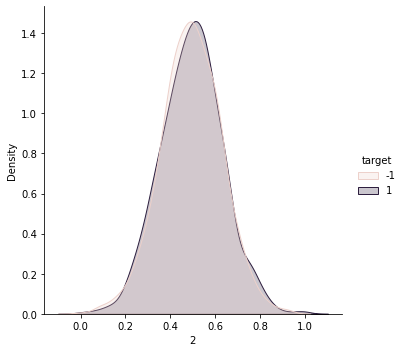

In [44]:
import seaborn as sns
sns.displot(df, x=df[2], hue="target", kind="kde", fill=True)

O problema é fazer isto para 500 atributos. Por isso que o ideal é identificar quais atributos tem um ganho de informação maior e então visualizarmos cada um destes atributos.

In [55]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, mutual_info_classif

attrs = SelectKBest(mutual_info_classif, k=5).fit(df.iloc[:,0:499], df['target']).get_support(indices=True)

In [56]:
attrs

array([241, 337, 338, 349, 417])

Abaixo são apresentados os atributos com maior ganho de informação. Ou seja, os atributos que melhor separam os exemplos da classe que queremos aprender.

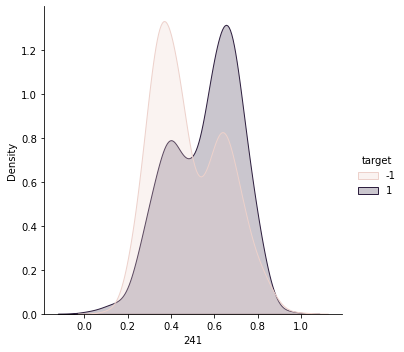

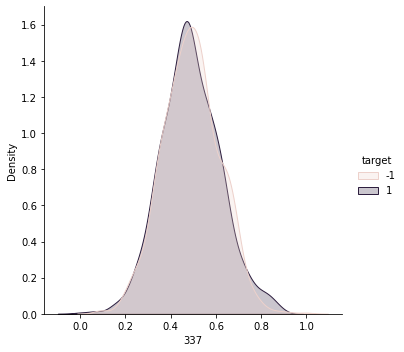

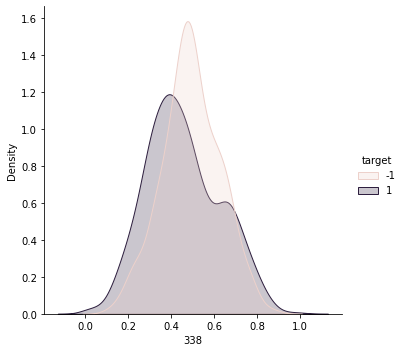

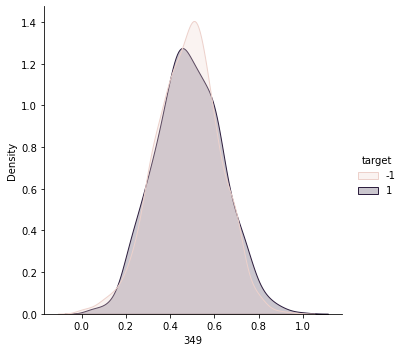

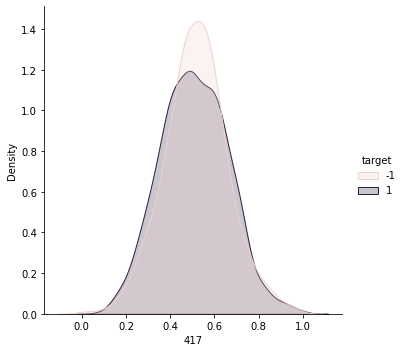

In [62]:
sns.displot(df, x=df[241], hue="target", kind="kde", fill=True)
sns.displot(df, x=df[337], hue="target", kind="kde", fill=True)
sns.displot(df, x=df[338], hue="target", kind="kde", fill=True)
sns.displot(df, x=df[349], hue="target", kind="kde", fill=True)
sns.displot(df, x=df[417], hue="target", kind="kde", fill=True)

Com os gráficos apresentados acima fica claro que nenhum atributo consegue separar muito bem o dataset de forma isolada. 

## Exporting dataset values

In [63]:
df.to_csv(path_or_buf="../../../data/madelon_post_eda_train.csv")